In [1]:
import pandas as pd

benin = pd.read_csv("../data/clean/benin_clean.csv", parse_dates=["Timestamp"])
sierra_leone = pd.read_csv("../data/clean/sierraleone_clean.csv", parse_dates=["Timestamp"])
togo = pd.read_csv("../data/clean/togo_clean.csv", parse_dates=["Timestamp"])

benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


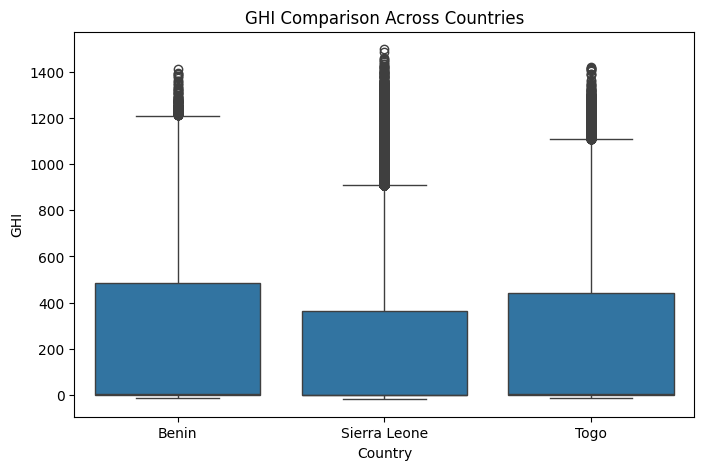

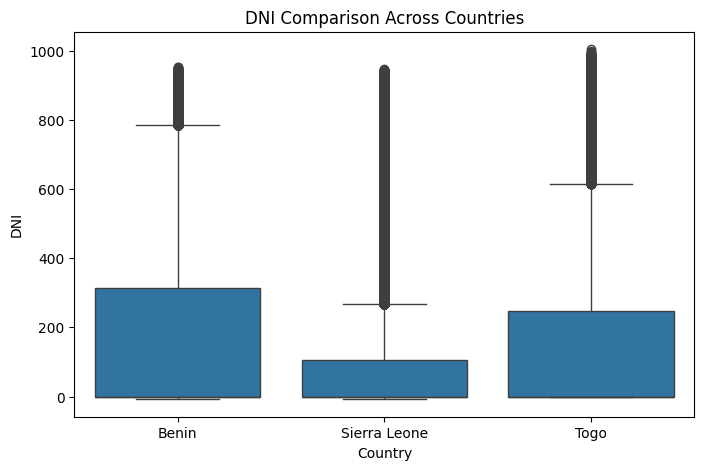

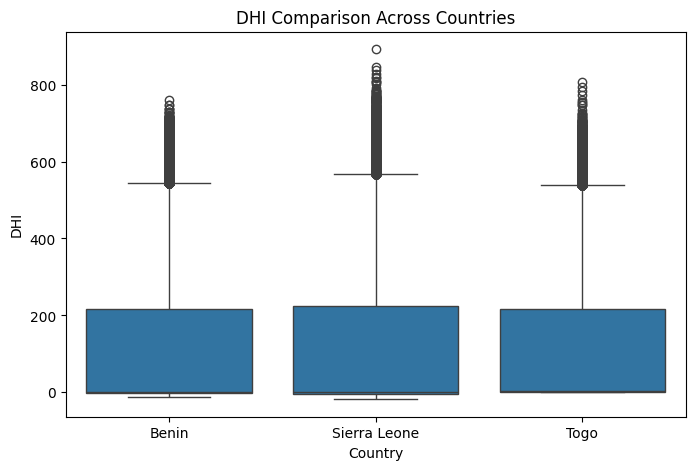

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Country", y=metric, data=df_all)
    plt.title(f"{metric} Comparison Across Countries")
    plt.show()


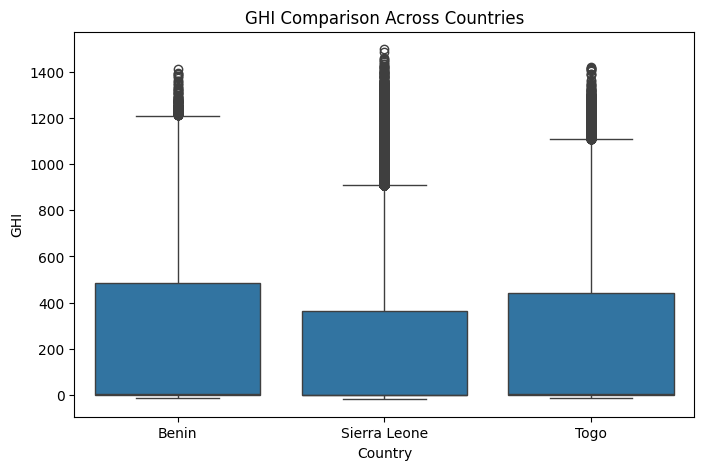

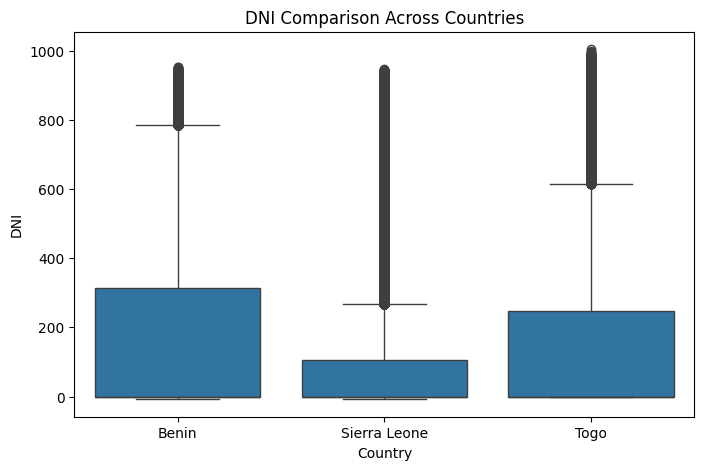

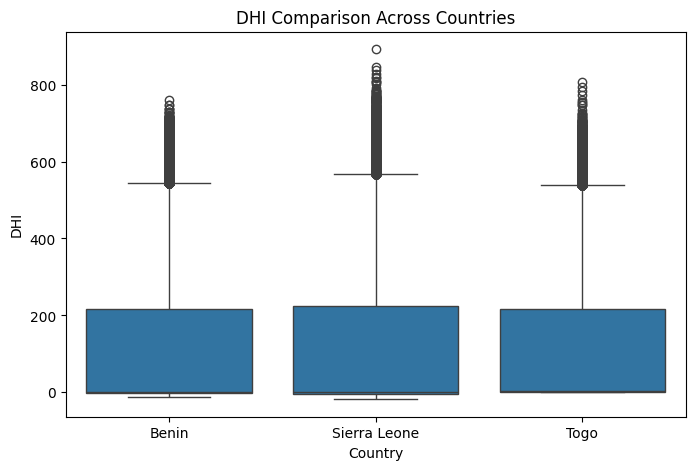

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Country", y=metric, data=df_all)
    plt.title(f"{metric} Comparison Across Countries")
    plt.show()


In [4]:
summary = df_all.groupby("Country")[metrics].agg(['mean','median','std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [5]:
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    df_all[df_all["Country"]=="Benin"]["GHI"],
    df_all[df_all["Country"]=="Sierra Leone"]["GHI"],
    df_all[df_all["Country"]=="Togo"]["GHI"]
)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 2090.09, p-value: 0.0000


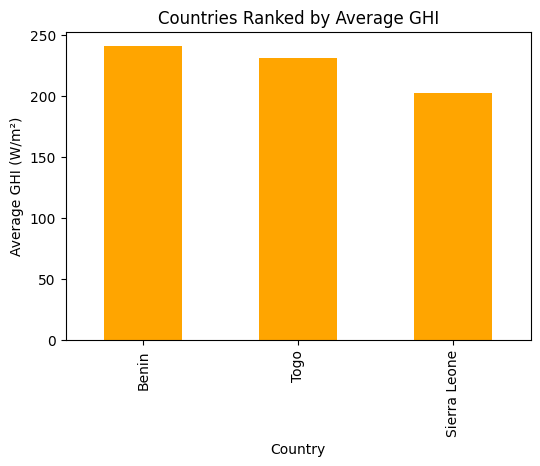

In [6]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)
avg_ghi.plot(kind="bar", figsize=(6,4), color="orange")
plt.ylabel("Average GHI (W/m²)")
plt.title("Countries Ranked by Average GHI")
plt.show()
